# 데이터 로드

In [50]:
# from google.colab import drive
# drive.mount('/content/drive')

In [51]:
# import pandas as pd

# # Google Drive와 연동된 파일 경로를 지정합니다.
# file_path = "/content/drive/MyDrive/데이터분석/team2/combined_review.xlsx"

# # 파일을 읽어들입니다.
# combind = pd.read_excel(file_path)

# # DataFrame의 크기(shape)를 출력합니다.
# print(combind.shape)

In [52]:
import pandas as pd
import numpy as np
import re

In [53]:
file_path = "../02. Train_Test Data/combined_review.xlsx"

# 파일을 읽어들입니다.
combined_original = pd.read_excel(file_path)

# DataFrame의 크기(shape)를 출력합니다.
print(combined_original.shape)

(30555, 7)


In [54]:
combined = combined_original.copy()
combined

,회사명,고유 제품명,형태,작성일,별점,제목_본문,채널명
0,biobidet,BB A8,E,2016-12-01,5,AMAZING.I couldn’t be happier!!! A must for an...,lowes
1,biobidet,BB A8,E,2016-11-06,5,Good Product!.It takes just minutes to install...,lowes
2,biobidet,BB A8,E,2019-09-17,5,Very Satisfied....Love the night glow light. V...,lowes
3,biobidet,BB A8,E,2020-10-02,4,Great features and easy to install.Steady hot ...,lowes
4,biobidet,BB A8,E,2019-05-13,5,Wonderful features.I bought 10 days ago and us...,lowes
...,...,...,...,...,...,...,...
30550,ovedecors,Irenne,E,2022-02-03,5,Worth every penny.We love our new toilet! We h...,costco
30551,ovedecors,Irenne,E,2022-06-03,5,Worth every penny!.It’s a beautiful toilet tha...,costco
30552,ovedecors,Irenne,E,2022-06-03,4,Worth it.I’ve had this for a couple weeks now ...,costco
30553,ovedecors,Irenne,E,2020-11-30,5,You will miss this.Good but needs some tweakin...,costco


# 전처리

In [55]:
test =[]
for i in combined['제목_본문']:
    # 길이가 1~2인 단어들을 정규 표현식을 이용하여 삭제
    shortword = re.compile(r'\W*\b\w{1,2}\b')
    ii = shortword.sub('',i)
    test.append(ii)

print(test[:10])

['AMAZING couldn happier must for anyone have...', 'Good Product takes just minutes install. Great features expected.', 'Very Satisfied....Love the night glow light. Very easy install and works great.', 'Great features and easy install.Steady hot water flow but pressure not much USPA luxury bidet', 'Wonderful features bought days ago and use everyday very satisfied with.', 'everybody family love this product easily install. Everybody family love after the first use.', 'Great Features.Easy use with the remote. The best seat have tried after long searching!', 'Great product bought this product few weeks ago and its great. Easy install and use.', 'Great product.Very easy install.  Nice and clean look.  Was able get this great price.', 'Easy install.Easy install and easy use.  Works great very pleased with this product.']


In [56]:
combined['제목_본문'] = test
combined['제목_본문'][:10]

0       AMAZING couldn happier must for anyone have...
1    Good Product takes just minutes install. Great...
2    Very Satisfied....Love the night glow light. V...
3    Great features and easy install.Steady hot wat...
4    Wonderful features bought days ago and use eve...
5    everybody family love this product easily inst...
6    Great Features.Easy use with the remote. The b...
7    Great product bought this product few weeks ag...
8    Great product.Very easy install.  Nice and cle...
9    Easy install.Easy install and easy use.  Works...
Name: 제목_본문, dtype: object

In [57]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# 특수 문자, 숫자 등의 불필요한 문자를 제거합니다.
combined['제목_본문'] = combined['제목_본문'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))

# 대/소문자를 통일합니다.
combined['제목_본문'] = combined['제목_본문'].apply(lambda x: x.lower())

# 토큰화합니다.
combined['tokens'] = combined['제목_본문'].apply(lambda x: nltk.word_tokenize(x))

# 불용어를 제거합니다.
stop_words = set(stopwords.words('english'))
combined['tokens'] = combined['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# 어간 추출을 수행합니다.
# stemmer = PorterStemmer()
# combined['tokens'] = combined['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])

lemmatizer = WordNetLemmatizer()
combined['tokens'] = combined['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [59]:
# 각 리스트를 문자열로 변환합니다.
combined['tokens_str'] = combined['tokens'].apply(lambda x: ' '.join(x))

# 변환된 문자열 데이터를 출력합니다.
print(combined['tokens_str'])

0                              amazing happier must anyone
1        good product take minute install great feature...
2        satisfied love night glow light easy install w...
3        great feature easy install steady hot water fl...
4        wonderful feature bought day ago use everyday ...
                               ...                        
30550    worth every penny love new toilet never used b...
30551    worth every penny beautiful toilet great funct...
30552    worth couple week really love height sleek loo...
30553                        miss good need tweaking bidet
30554    mad buy easy install work great totally worth ...
Name: tokens_str, Length: 30555, dtype: object


In [60]:
combined

,회사명,고유 제품명,형태,작성일,별점,제목_본문,채널명,tokens,tokens_str
0,biobidet,BB A8,E,2016-12-01,5,amazing couldn happier must for anyone have,lowes,"[amazing, happier, must, anyone]",amazing happier must anyone
1,biobidet,BB A8,E,2016-11-06,5,good product takes just minutes install great...,lowes,"[good, product, take, minute, install, great, ...",good product take minute install great feature...
2,biobidet,BB A8,E,2019-09-17,5,very satisfied love the night glow light v...,lowes,"[satisfied, love, night, glow, light, easy, in...",satisfied love night glow light easy install w...
3,biobidet,BB A8,E,2020-10-02,4,great features and easy install steady hot wat...,lowes,"[great, feature, easy, install, steady, hot, w...",great feature easy install steady hot water fl...
4,biobidet,BB A8,E,2019-05-13,5,wonderful features bought days ago and use eve...,lowes,"[wonderful, feature, bought, day, ago, use, ev...",wonderful feature bought day ago use everyday ...
...,...,...,...,...,...,...,...,...,...
30550,ovedecors,Irenne,E,2022-02-03,5,worth every penny love our new toilet had neve...,costco,"[worth, every, penny, love, new, toilet, never...",worth every penny love new toilet never used b...
30551,ovedecors,Irenne,E,2022-06-03,5,worth every penny beautiful toilet that has gr...,costco,"[worth, every, penny, beautiful, toilet, great...",worth every penny beautiful toilet great funct...
30552,ovedecors,Irenne,E,2022-06-03,4,worth had this for couple weeks now and really...,costco,"[worth, couple, week, really, love, height, sl...",worth couple week really love height sleek loo...
30553,ovedecors,Irenne,E,2020-11-30,5,you will miss this good but needs some tweakin...,costco,"[miss, good, need, tweaking, bidet]",miss good need tweaking bidet


# 워드클라우드

In [61]:
combined.loc[combined['회사명'] == 'biobidet']['tokens_str']

0                              amazing happier must anyone
1        good product take minute install great feature...
2        satisfied love night glow light easy install w...
3        great feature easy install steady hot water fl...
4        wonderful feature bought day ago use everyday ...
                               ...                        
25562        never without bidet love bidet everything say
25563    never want back caveman way love night light u...
25564    going wonder lived without absolutely love ins...
25565    got absolutely love cold seat bottom really cl...
25566    zero complaint easy setup first bidet got ta s...
Name: tokens_str, Length: 18386, dtype: object

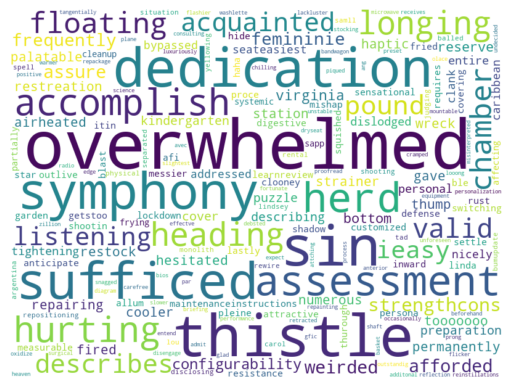

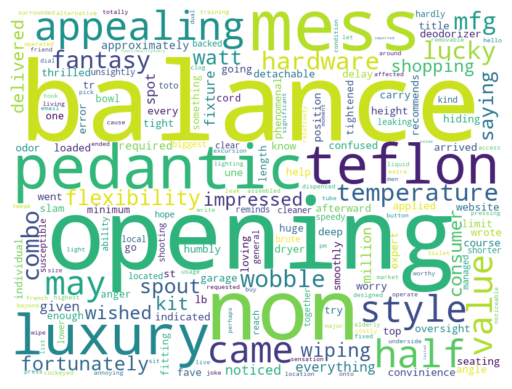

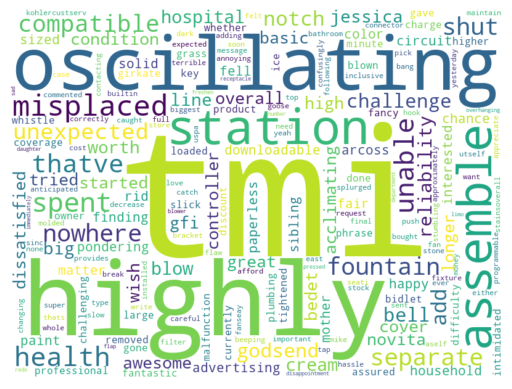

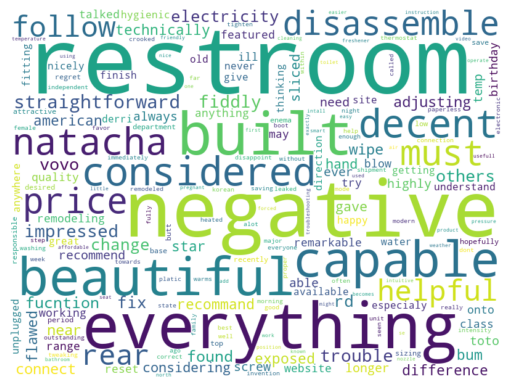

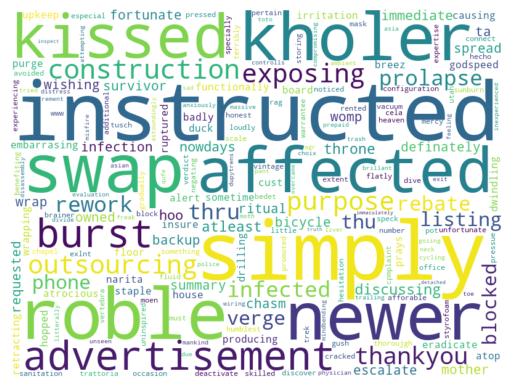

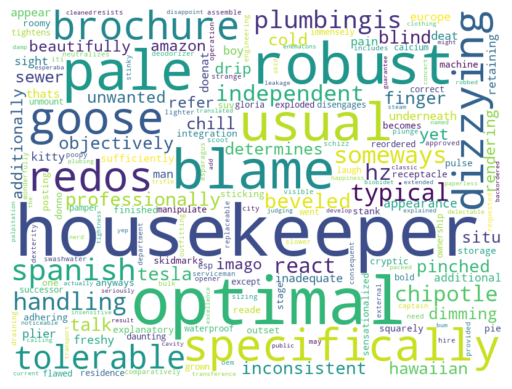

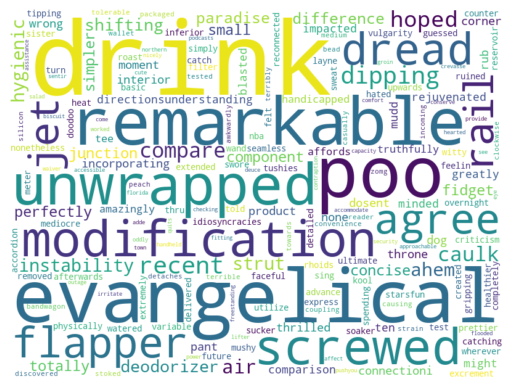

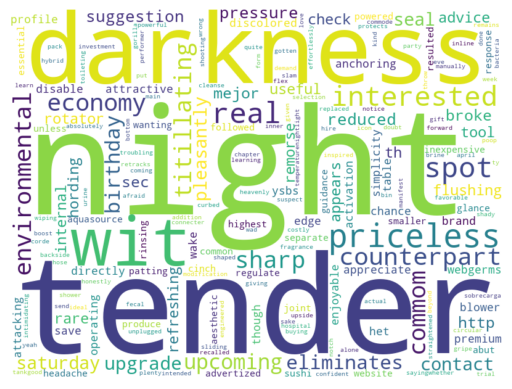

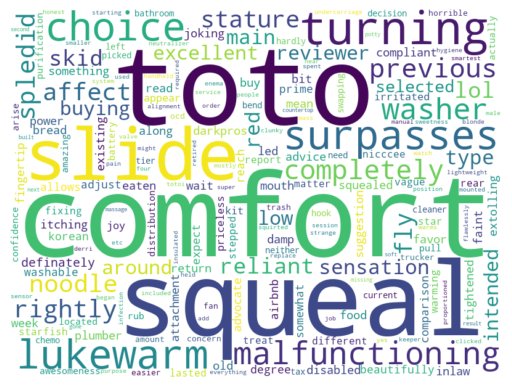

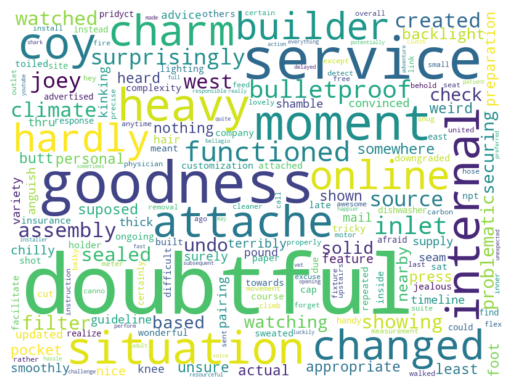

In [62]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# 데이터프레임에서 회사명 추출
companies = combined['회사명'].unique()

for company in companies:
    # 회사별 corpus 생성
    company_data = combined.loc[combined['회사명'] == company]['tokens_str']
    corpus = []
    for p in company_data:
        corpus.append(p)
    
    # CountVectorizer 객체 생성
    vectorizer = CountVectorizer()

    # 단어-문서 행렬 생성
    X = vectorizer.fit_transform(corpus)

    # 단어와 빈도수 값 추출
    words = vectorizer.vocabulary_
    counts = X.toarray().sum(axis=0)

    # 단어와 빈도수 값을 딕셔너리로 변환
    word_dict = dict(zip(words, counts))
#     print(word_dict)

    # WordCloud 객체 생성
    wordcloud = WordCloud(background_color='white', width=800, height=600).generate_from_frequencies(word_dict)

    # WordCloud 객체 시각화
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    # WordCloud 이미지 파일로 저장
    image_path = f'{company}.png'
    plt.savefig(image_path, bbox_inches='tight')
    plt.show()